In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os,glob
os.chdir("../helpers")
import helpers

# correct path to right experiment folder
os.chdir("../../results/preliminaries/joint_syndisc/")


In [4]:
# prep pickle for plot
files = glob.glob("*.pkl")[-1:]
print(files)
files_dataframes = [pd.read_pickle(f) for f in files]
d = files_dataframes
d = pd.concat(d)

['states4time20220203-222100.pkl']


In [5]:
d['H(S)'] = d['H(S)'].fillna(0)
d['rel_syn'] = d['syn_info']/d['syn_upper']
d = helpers.sort_systems_runs(d)
d = helpers.swithcols(['states','systemID','runID','syn_info','rel_syn'],d)
d['rel_syn'].max()

C:\Users\enrik\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0.8949624505552096

## For each number of states, plot runtime vs $\frac{I(S;X)}{H(X)-H(Xmax)}$ with jointpdf \& syndisc 

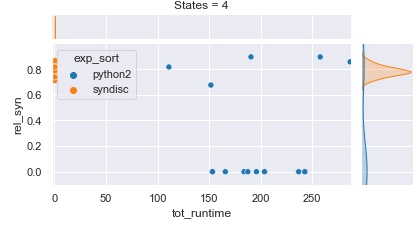

In [9]:
import matplotlib.gridspec as gridspec
import seaborn as sns; sns.set()

states = d['states'].unique()
fig = plt.figure(figsize=(6*len(states),5*len(states)))
gs = gridspec.GridSpec(1,len(states))
xlabel = 'tot_runtime'
ylabel = 'rel_syn'
for i,s in enumerate(states):
    g = sns.jointplot(data=d[d['states']==s], x=xlabel, y=ylabel, 
                      hue="exp_sort",palette='tab10', space=0)
    g.ax_marg_y.set_ylim(-0.1,d[d['states']==s][ylabel].max()+0.1)
    g.ax_marg_x.set_xlim(-2.5,d[d['states']==s][xlabel].max()+1)
    m = helpers.SeabornFig2Grid(g, fig, gs[i],"States = "+str(s))

gs.tight_layout(fig)
gs.update(top=0.6)

plt.show()